In [1]:
using DifferentialEquations, Plots, DSP
using Distributions: Gamma, pdf, Uniform

In [14]:
signal = zeros(275, 3);

signal[21:30,1] .= 1
signal[51:60,1] .= 1
signal[81:90,1] .= 1
signal[111:120,1] .= 1
signal[151:160,1] .= 1

signal[36:45,2] .= 1
signal[66:75,2] .= 1
signal[96:105,2] .= 1
signal[126:135,2] .= 1
signal[166:175,2] .= 1

signal[201:210,3] .= 1
signal[241:260,3] .= 1

20-element view(::Matrix{Float64}, 241:260, 3) with eltype Float64:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

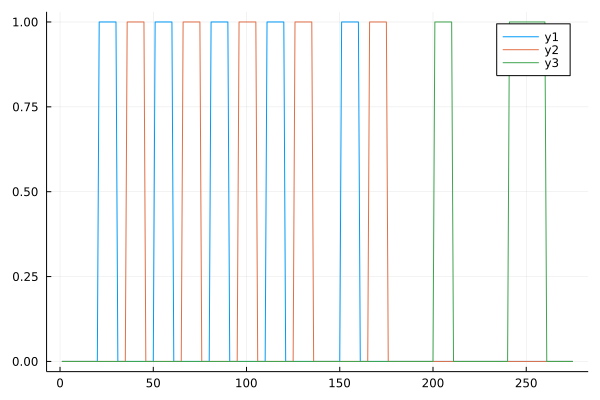

In [16]:
plot(signal[:,1])
plot!(signal[:,2])
plot!(signal[:,3])

In [28]:
zeros(size([6., 16., 1., 1., 6., 0., 32.]))[1:2]

2-element Vector{Float64}:
 0.0
 0.0

In [31]:
sum((range(0, 10) * 10) |> collect)

550

In [79]:
function spm_Gpdf(x, α, β)
    k = α
    Θ = 1/β
    dist = Gamma(α,Θ)
    return pdf.(dist, x)
end


function spm_hrf(RT)
    p = [6., 16., 1., 1., 6., 0., 32.]
    fMRI_T=16
    
    dt = RT / fMRI_T
    u = (range(0, ceil(Int64,p[7]/dt), step=1) |> collect) .- (p[6]/dt)
    
    hrf = spm_Gpdf(u, p[1]/p[3], dt/p[3]) - spm_Gpdf(u, p[2]/p[4], dt/p[4])/p[5]
    print(range(0, floor(Int64,p[7]/RT)))
    hrf = hrf[range(0, floor(Int64,p[7]/RT))*fMRI_T .+ 1]
    return hrf/sum(hrf)
end

spm_hrf (generic function with 1 method)

In [80]:
function hrf(x)
    peak_val= pdf(Gamma(6), x)
    undershoot_val = pdf(Gamma(12), x)
    val = peak_val - 0.35undershoot_val
    return val / 0.1727 * 0.6
end

hrf (generic function with 1 method)

In [84]:
TR = 1.2

hrf_signal = spm_hrf(TR);
conv_signal = DSP.conv(hrf_signal, signal);

0:26

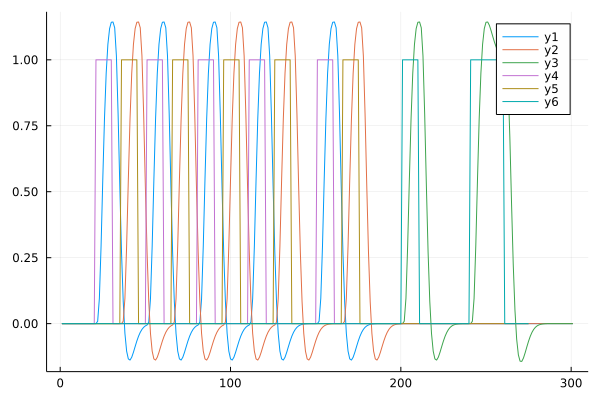

In [89]:
plot(conv_signal)
plot!(signal)

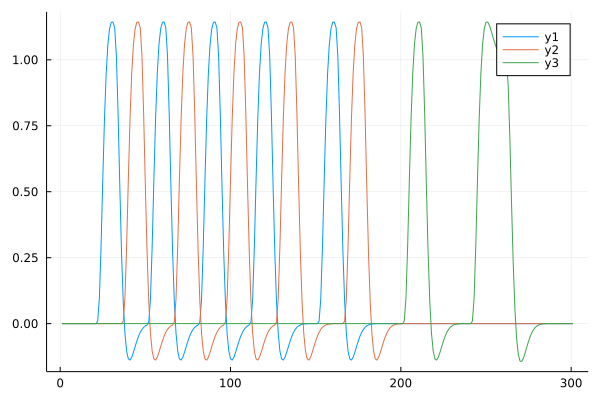